 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [36]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [37]:
csv_path = Path("Resources/whale_returns.csv")

In [38]:
# Reading whale returns
whale_df = pd.read_csv(csv_path, parse_dates=True, index_col='Date')

In [39]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [40]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [41]:
def data_cleaner(file_name):
    '''
    This function reads a CSV file into a DataFrame, checks for null values, 
    drops any rows with null values, and returns the cleaned DataFrame.
    '''
    # Reading the csv file
    csv_path = Path(f"Resources/{file_name}")
    df = pd.read_csv(csv_path, parse_dates=True, index_col='Date')
    # Count nulls
    print(df.isnull().sum())
    # Drop nulls
    df = df.dropna()
    return df

whale_df=clean_data('whale_returns.csv')

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [42]:
# Reading algorithmic returns
csv_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(csv_path, parse_dates=True, index_col='Date')

In [43]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [44]:
# Drop nulls
algo_df=algo_df.dropna()

In [45]:
# Using data_cleaner function to clean data
algo_df=data_cleaner("algo_returns.csv")

Algo 1    0
Algo 2    6
dtype: int64


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [46]:
# Reading S&P TSX 60 Closing Prices
csv_path = Path("Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(csv_path, parse_dates=True, index_col='Date')
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [47]:
# Check Data Types
print(sp_tsx_df.describe(include='all'))
print(sp_tsx_df.dtypes)

             Close
count         1818
unique        1814
top     $16,074.30
freq             2
Close    object
dtype: object


In [48]:
# Fix Data Types
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '',regex=False)
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '',regex=False)
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype(float)

In [49]:
# Calculate Daily Returns
sp_tsx_df['daily_returns'] = sp_tsx_df['Close'].pct_change()

In [50]:
# Drop nulls
sp_tsx_df = sp_tsx_df.dropna()

In [51]:
# Rename `Close` Column to be specific to this portfolio.
columns=['s&p_tsx_close','s&p_tsx_daily_returns']
sp_tsx_df.columns = columns

In [52]:
sp_tsx_df.columns

Index(['s&p_tsx_close', 's&p_tsx_daily_returns'], dtype='object')

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [58]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_return_df = pd.concat([whale_df, algo_df, sp_tsx_df], axis='columns', join='inner')
portfolio_return_df.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,s&p_tsx_close,s&p_tsx_daily_returns
Date,,,,,,,,
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,16317.65,-0.001944
2016-05-04,-0.007072,-0.009152,0.009203,-0.008969,-0.006192,-0.004789,13632.00,-0.005521
2018-08-29,0.003578,0.002776,0.006234,0.001879,-0.002434,0.003543,16390.29,0.002125
2016-10-17,-0.004625,-0.005625,0.001369,-0.002054,-0.001056,-0.003447,14596.52,0.000791
2016-02-11,0.000000,0.000000,0.000000,0.000000,-0.001994,-0.014178,12087.37,-0.008071


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date', ylabel='return'>

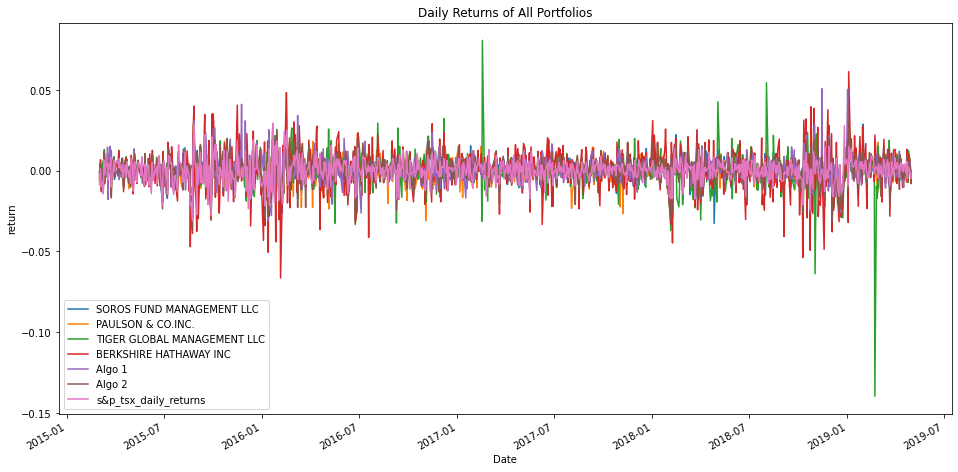

In [62]:
# Plot daily returns of all portfolios
all_df = portfolio_return_df.drop(columns=['s&p_tsx_close'])
all_df.plot(figsize=(16,8),title='Daily Returns of All Portfolios',ylabel='return')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date', ylabel='Cumulative Return'>

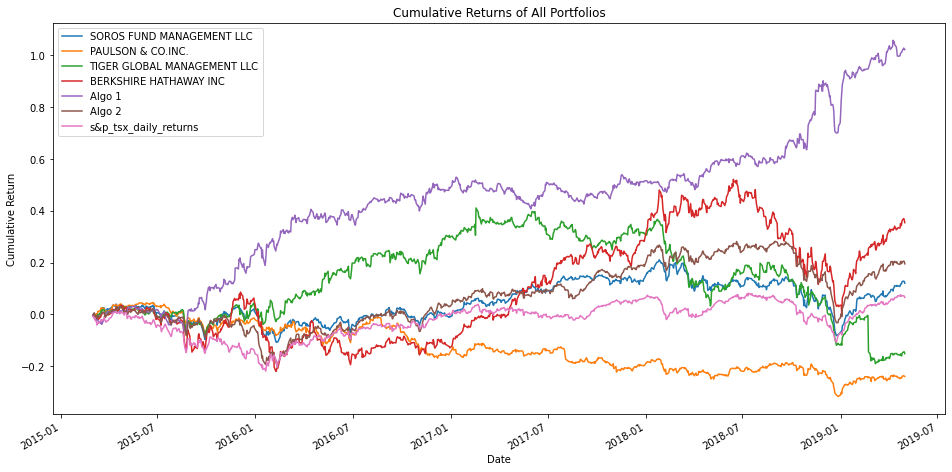

In [64]:
# Calculate cumulative returns of all portfolios
portfolio_cumulative_return_df = (1 + all_df).cumprod() - 1
# Plot cumulative returns
portfolio_cumulative_return_df.plot(figsize=(16,8),title='Cumulative Returns of All Portfolios',ylabel='Cumulative Return')


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

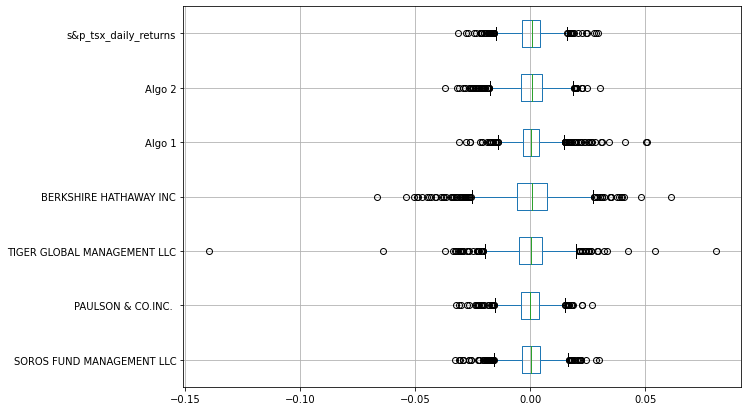

In [70]:
# Box plot to visually show risk
all_df.boxplot(figsize=(10,7),vert=False)

### Calculate Standard Deviations

In [71]:
# Calculate the daily standard deviations of all portfolios
portfolio_daily_std = portfolio_return_df.std()
portfolio_daily_std.head(10)

SOROS FUND MANAGEMENT LLC         0.007828
PAULSON & CO.INC.                 0.006982
TIGER GLOBAL MANAGEMENT LLC       0.010883
BERKSHIRE HATHAWAY INC            0.012826
Algo 1                            0.007589
Algo 2                            0.008326
s&p_tsx_close                  1016.677139
s&p_tsx_daily_returns             0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [73]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = portfolio_daily_std['s&p_tsx_daily_returns']
# Determine which portfolios are riskier than the S&P TSX 60
risky_df= portfolio_daily_std[portfolio_daily_std>sp_std]
risky_df


SOROS FUND MANAGEMENT LLC         0.007828
TIGER GLOBAL MANAGEMENT LLC       0.010883
BERKSHIRE HATHAWAY INC            0.012826
Algo 1                            0.007589
Algo 2                            0.008326
s&p_tsx_close                  1016.677139
dtype: float64

### Calculate the Annualized Standard Deviation

In [75]:
# Calculate the annualized standard deviation (252 trading days)
annual_std_dev = portfolio_daily_std * np.sqrt(252)
annual_std_dev


SOROS FUND MANAGEMENT LLC          0.124259
PAULSON & CO.INC.                  0.110841
TIGER GLOBAL MANAGEMENT LLC        0.172759
BERKSHIRE HATHAWAY INC             0.203599
Algo 1                             0.120470
Algo 2                             0.132177
s&p_tsx_close                  16139.249245
s&p_tsx_daily_returns              0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

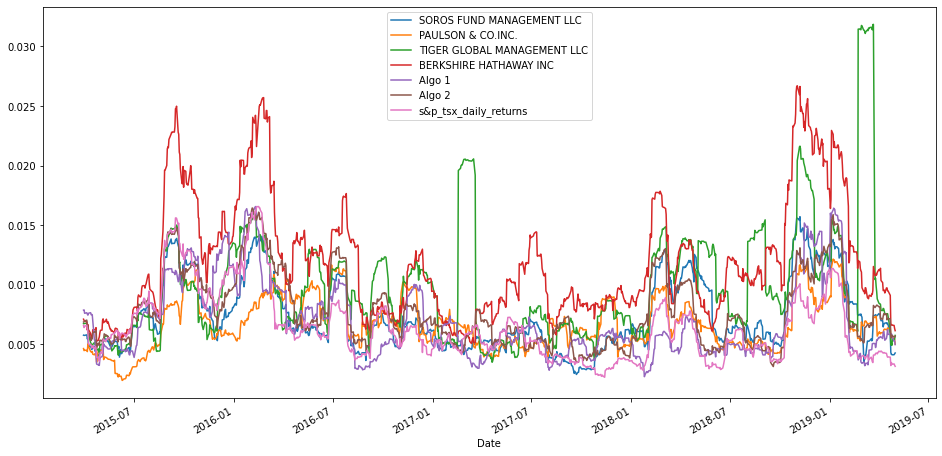

In [80]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_dev = all_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_dev.plot(figsize=(16,8))


### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
s&p_tsx_daily_returns                         0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236   
Algo 2         

<AxesSubplot:>

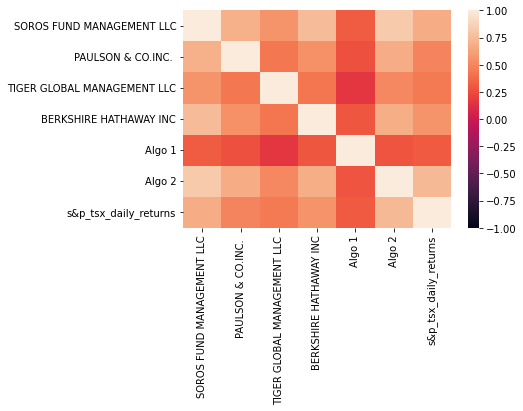

In [84]:
# Calculate the correlation
correlation = all_df.corr()
# Display de correlation matrix
print(correlation)
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day'}, xlabel='Date'>

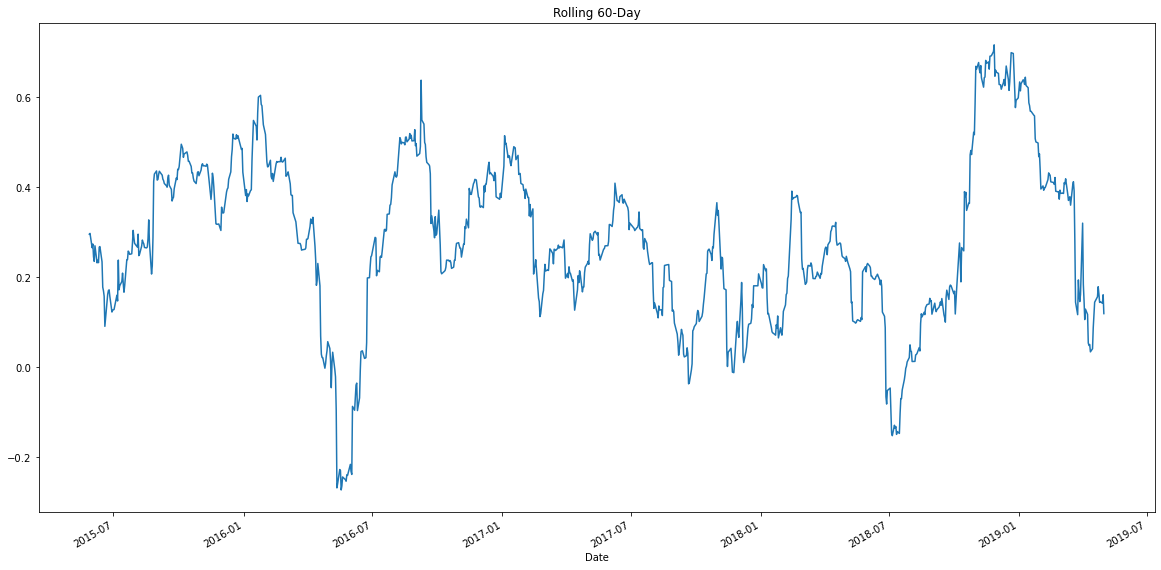

In [91]:
# Calculate covariance of a single portfolio
covariance = all_df['Algo 1'].rolling(window=60).cov(all_df['s&p_tsx_daily_returns'])

# Calculate variance of S&P TSX
variance = all_df['s&p_tsx_daily_returns'].rolling(window=60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(20, 10), title='Rolling 60-Day')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponential Moving Average - Half-Life 21 Days'}, xlabel='Date'>

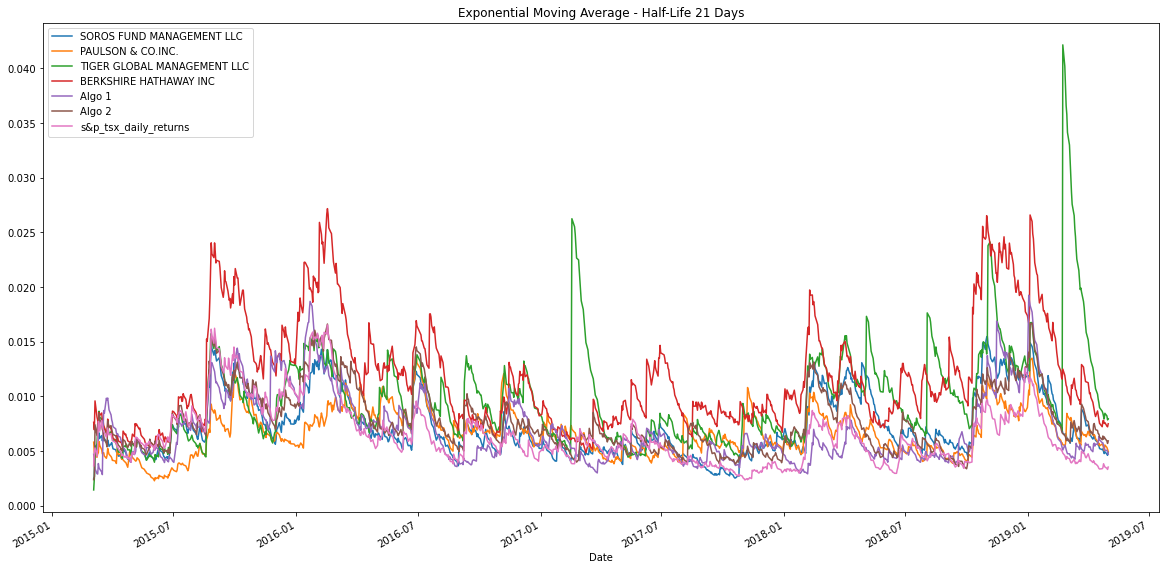

In [89]:
# Use `ewm` to calculate the rolling window
ewm = all_df.ewm(span=21).std()
ewm.plot(figsize=(20, 10), title='Exponential Moving Average - Half-Life 21 Days')


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Annualized Sharpe Ratios
# Annualized Sharpe Ratios
avg_annual_return = all_df.mean() * 252
std_annual = all_df.std() * np.sqrt(252)
sharpe_ratios = avg_annual_return / std_annual

<AxesSubplot:title={'center':'Sharpe Ratios'}>

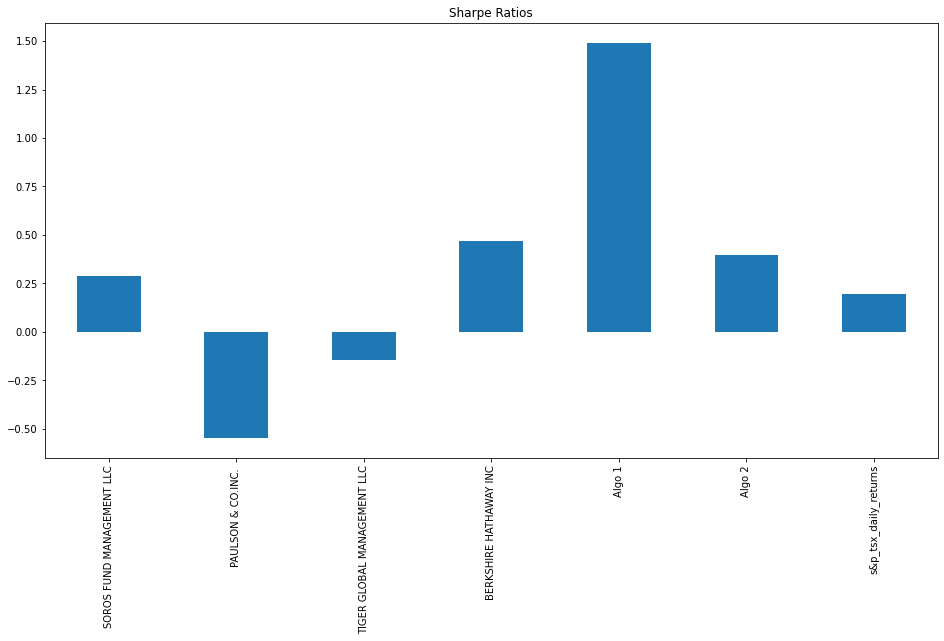

In [95]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(16, 8),kind="bar", title="Sharpe Ratios")


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [102]:
# Reading data from 1st stock
l_csv = Path("Resources/l_historical.csv")
l_df = pd.read_csv(l_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [116]:
# Reading data from 2nd stock
otex_csv = Path("Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [151]:
# Reading data from 3rd stock
shop_csv = Path("Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [152]:
# Combine all stocks in a single DataFrame
portfolio_df = pd.concat([l_df, otex_df,shop_df], axis=0, join="inner")
portfolio_df

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [153]:
# Reset Date index
portfolio_df=portfolio_df.reset_index()

In [154]:
# Reorganize portfolio data by having a column per symbol
portfolio_df=portfolio_df.pivot_table(values="Close", index="Date", columns="Symbol")
portfolio_df

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [155]:
# Calculate daily returns
portfolio_df = portfolio_df.pct_change()
# Drop NAs
portfolio_df=portfolio_df.dropna()
# Display sample data
portfolio_df.head(3)

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [156]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_df['Portfolio Daily Returns'] = portfolio_df.dot(weights)

# Display sample data
portfolio_df.sample(3)


Symbol,L,OTEX,SHOP,Portfolio Daily Returns
Date,,,,
2018-12-31,0.008416,0.005423,0.037194,0.017011
2018-07-18,-0.005768,0.006279,0.005924,0.002145
2018-03-20,0.005179,-0.004510,0.052112,0.017594


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [158]:
# Join your returns DataFrame to the original returns DataFrame
all_df.index = pd.to_datetime(all_df.index)
portfolio_df.index = pd.to_datetime(portfolio_df.index)
combined_df = pd.concat([all_df, portfolio_df['Portfolio Daily Returns']], axis='columns')
combined_df.sample(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,s&p_tsx_daily_returns,Portfolio Daily Returns
Date,,,,,,,,
2016-06-30,0.007980,0.003114,0.021142,0.009472,0.000309,0.010475,0.001981,NaN
2019-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003603
2018-01-17,0.008249,-0.002485,0.013650,0.008472,-0.000312,0.007632,0.001707,0.012460
2019-02-05,0.005616,0.004597,0.006946,0.016791,0.002153,0.002910,0.006433,0.009687
2019-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025644
2019-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004142
2016-02-12,0.000000,0.000000,0.000000,0.000000,0.005618,0.019414,0.024312,NaN
2018-01-23,0.000211,0.000202,0.001084,0.008253,0.002182,0.002544,0.000585,-0.000931
2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010335


In [159]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df=combined_df.dropna()
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,s&p_tsx_daily_returns,Portfolio Daily Returns
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [160]:
# Calculate the annualized `std`
combined_std_annual = combined_df.std() * np.sqrt(252)
print(combined_std_annual)

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
s&p_tsx_daily_returns          0.099121
Portfolio Daily Returns        0.224346
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

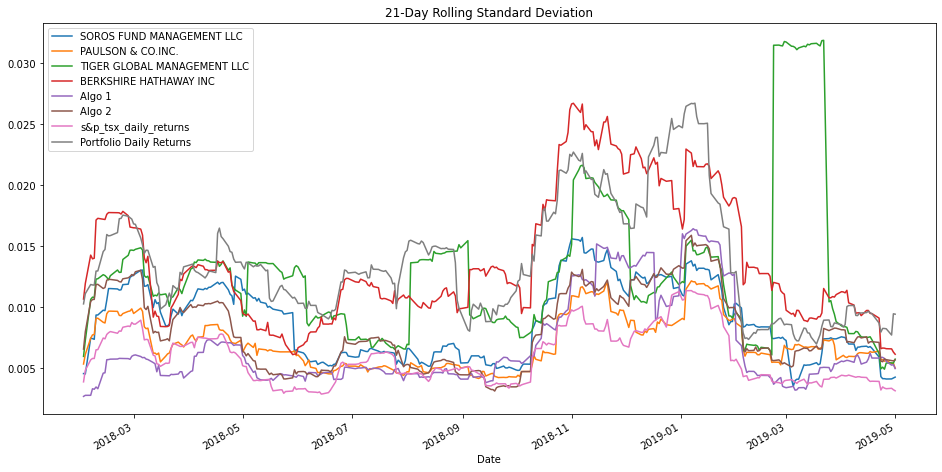

In [163]:
# Calculate rolling standard deviation
combined_rolling_std = combined_df.rolling(window=21).std()
:"
# Plot rolling standard deviation
combined_rolling_std.plot(figsize=(16,8),title="21-Day Rolling Standard Deviation")


### Calculate and plot the correlation

<AxesSubplot:>

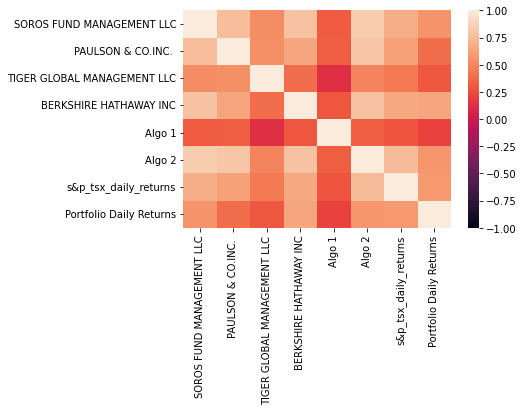

In [164]:
# Calculate and plot the correlation
correlation_combined = combined_df.corr()
sns.heatmap(correlation_combined, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day'}, xlabel='Date'>

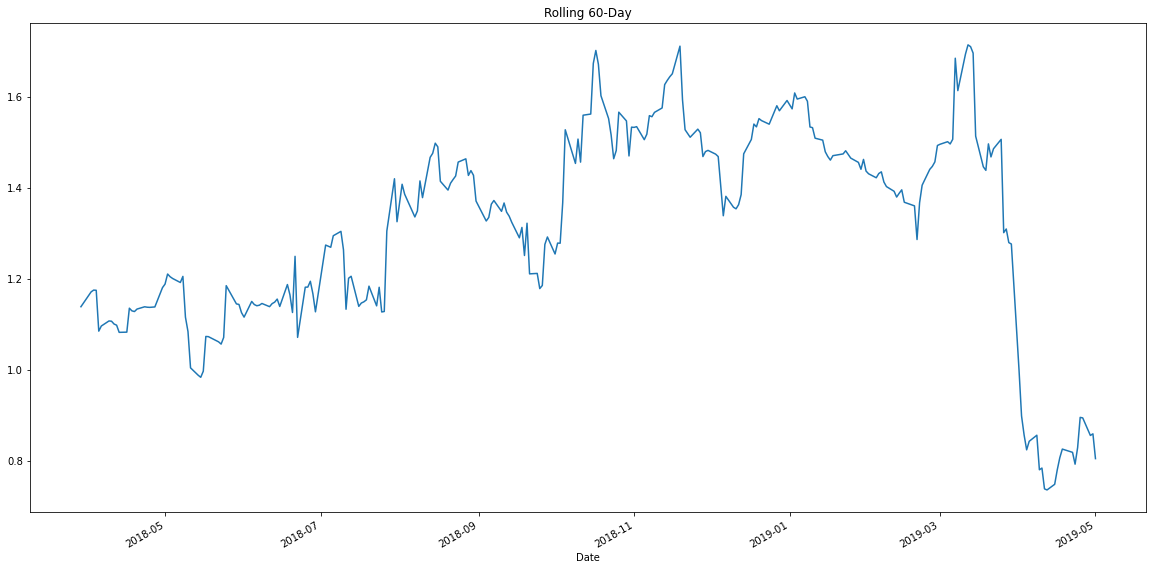

In [175]:
# Calculate and plot Beta
covariance_portfolio = combined_df['Portfolio Daily Returns'].rolling(window=60).cov(combined_df['s&p_tsx_daily_returns'])
variance_sp_tsx = combined_df['s&p_tsx_daily_returns'].rolling(window=60).var()
beta_portfolio = covariance_portfolio / variance_sp_tsx
beta_portfolio.plot(figsize=(20, 10), title='Rolling 60-Day')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [181]:
# Calculate Annualized Sharpe Ratios
avg_annual_return_combined = combined_df.mean() * 252
std_annual_combined = combined_df.std() * np.sqrt(252)
sharpe_ratios_combined = avg_annual_return_combined / std_annual_combined
sharpe_ratios_combined


SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
s&p_tsx_daily_returns          0.034651
Portfolio Daily Returns        1.564547
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios - Combined'}>

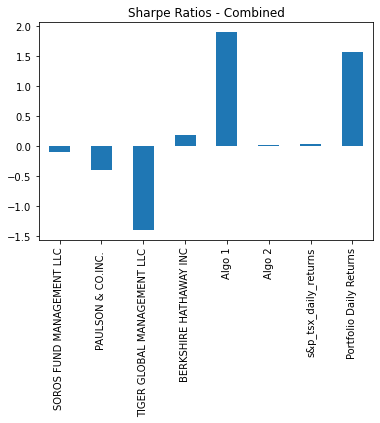

In [179]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_combined.plot(kind="bar", title="Sharpe Ratios - Combined")

### How does your portfolio do?

My portfolio has the second-best performance after Algo 1.